In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import plot_tree

In [26]:
df = pd.read_csv("/Users/thrilok/Desktop/mantra_collab_job/work_files/latest_broko_code/Dataset/residential_dataset_bd.csv")
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176641 entries, 0 to 176640
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ML_Number       176641 non-null  object 
 1   Postal_Code     176477 non-null  object 
 2   Tax Year        176637 non-null  float64
 3   Tax             176641 non-null  float64
 4   Basement1       176641 non-null  object 
 5   Bedrooms        176641 non-null  int64  
 6   Days_On_Market  176640 non-null  float64
 7   Exterior1       175705 non-null  object 
 8   Garage_Type     149193 non-null  object 
 9   Rooms           175900 non-null  float64
 10  Type            176641 non-null  object 
 11  Washrooms       176641 non-null  int64  
 12  Sold_Date       176640 non-null  object 
 13  Sold_Price      176641 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 18.9+ MB


In [27]:
drop_cols = ['ML_Number','Sold_Date',"Tax Year"]
df = df.drop(drop_cols, axis=1)
df.isnull().sum()

Postal_Code         164
Tax                   0
Basement1             0
Bedrooms              0
Days_On_Market        1
Exterior1           936
Garage_Type       27448
Rooms               741
Type                  0
Washrooms             0
Sold_Price            0
dtype: int64

In [28]:
data = df.dropna(axis = 0, how ='any') 

In [29]:
data.isnull().sum()

Postal_Code       0
Tax               0
Basement1         0
Bedrooms          0
Days_On_Market    0
Exterior1         0
Garage_Type       0
Rooms             0
Type              0
Washrooms         0
Sold_Price        0
dtype: int64

In [30]:
X = data.drop('Sold_Price',axis=1)
y = data['Sold_Price']

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder for each categorical column
label_encoders = {}

categorical_columns = [column for column, dtype in X.dtypes.items() if dtype==object]
label_encoders = {}
for feature in categorical_columns:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le

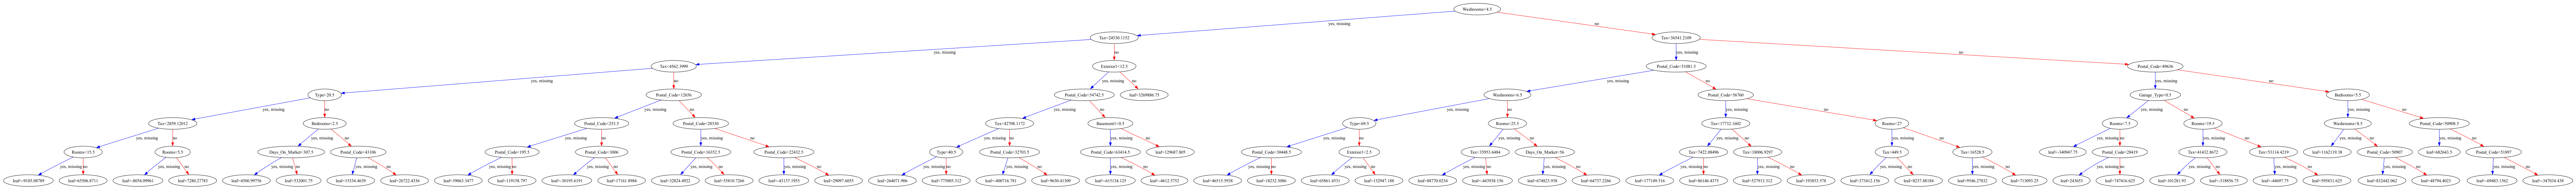

In [38]:
model = XGBRegressor()
model.fit(X, y)
# plot single tree
fig, ax = plt.subplots(figsize=(150, 150))
plot_tree(model, num_trees=8, ax=ax)
plt.show()